### Package and Data Imports

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the countries we're interested in (iShares MSCI ETFS)
etf_tickers = ['EWY','EWT','INDA','EWJ','EWH','EWA','EWS','THD','EWM','EIDO','EPHE','MCHI']

#EWY = South Korea, EWT = Taiwan, INDA = India, EWJ = Japan, EWH = Hong Kong, EWA = Australia, EWS = Singapore,
#THD = Thailand, EWM = Malaysia, EIDO = Indonesia, EPHE = Phillipines, MCHI= China

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
etf_data.head(10)

Symbols,EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI
Date,,,,,,,,,,,,
2019-01-02,56.828491,30.510044,32.524479,49.589836,21.326563,18.074434,20.838877,80.668388,28.260489,24.527048,32.156998,51.325272
2019-01-03,55.605213,29.554165,31.862928,49.308075,21.020941,17.941948,20.452274,79.536804,28.203396,24.245131,32.304958,50.020805
2019-01-04,57.366730,30.129642,32.879936,50.979206,21.775442,18.575974,21.112328,82.068481,28.603041,25.236710,33.488651,52.051064
2019-01-07,57.582027,30.392996,32.405991,51.105507,21.842297,18.632753,21.395208,82.480835,28.431765,25.372810,33.271637,52.551273
2019-01-08,56.936138,30.324720,32.504726,51.348412,22.061960,18.774698,21.527220,82.567146,28.536434,25.401974,33.044765,52.953400
2019-01-09,58.384499,30.890444,32.504726,51.630169,22.396235,19.039667,21.847818,82.739754,28.641104,25.450581,34.119953,54.140171
2019-01-10,58.619370,31.085522,32.554100,51.941078,22.558594,19.124832,22.140127,83.075394,28.964624,25.926928,34.435600,54.581532
2019-01-11,58.570435,31.046505,32.327000,51.338696,22.434435,19.124832,21.998686,82.586327,28.774315,25.732500,33.774708,54.218628
2019-01-14,57.904972,30.646597,31.872803,51.154091,22.319830,19.049128,21.894964,81.915054,28.688679,25.586679,34.248188,53.571301


### Comparing ETFs

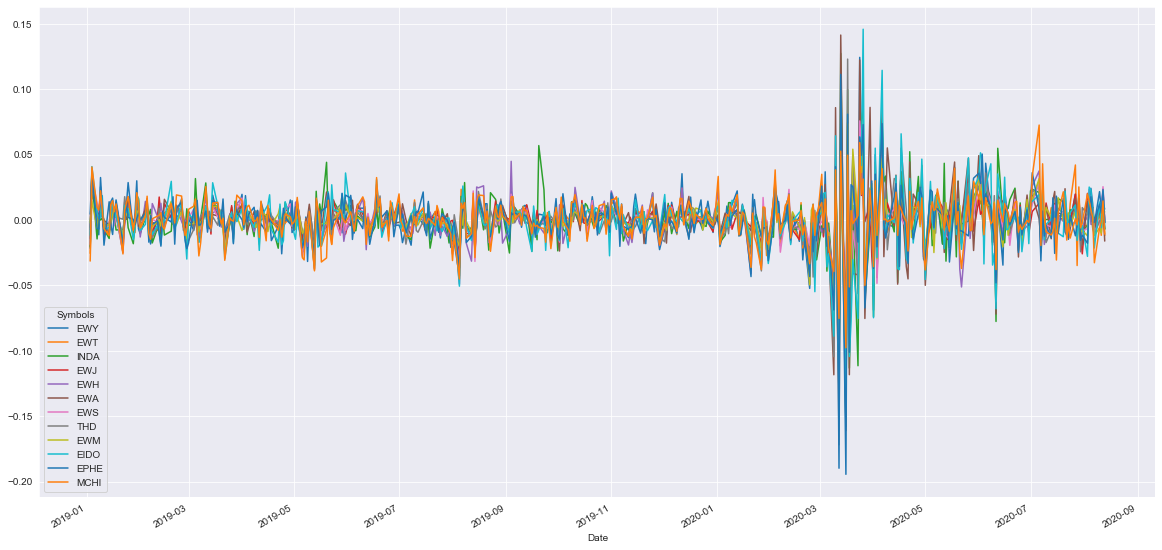

In [2]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
etf_data_pct_change = etf_data.pct_change() #calculating the percent change of the equity over the period
etf_data_pct_change.plot(grid=True, figsize=(20, 10));

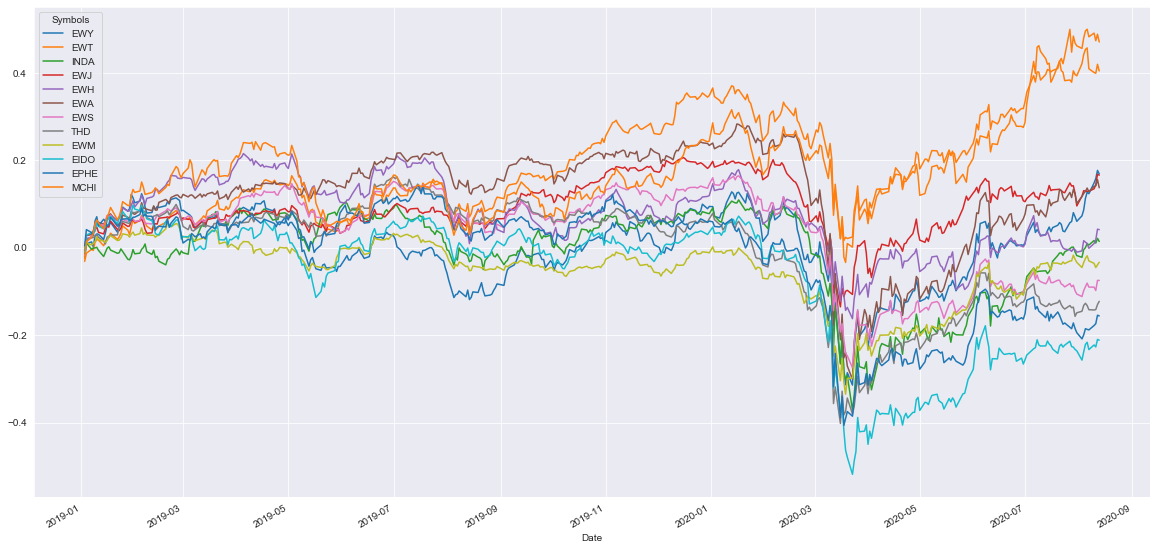

In [3]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + etf_data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages [South Korea/Taiwan/India/Japan]

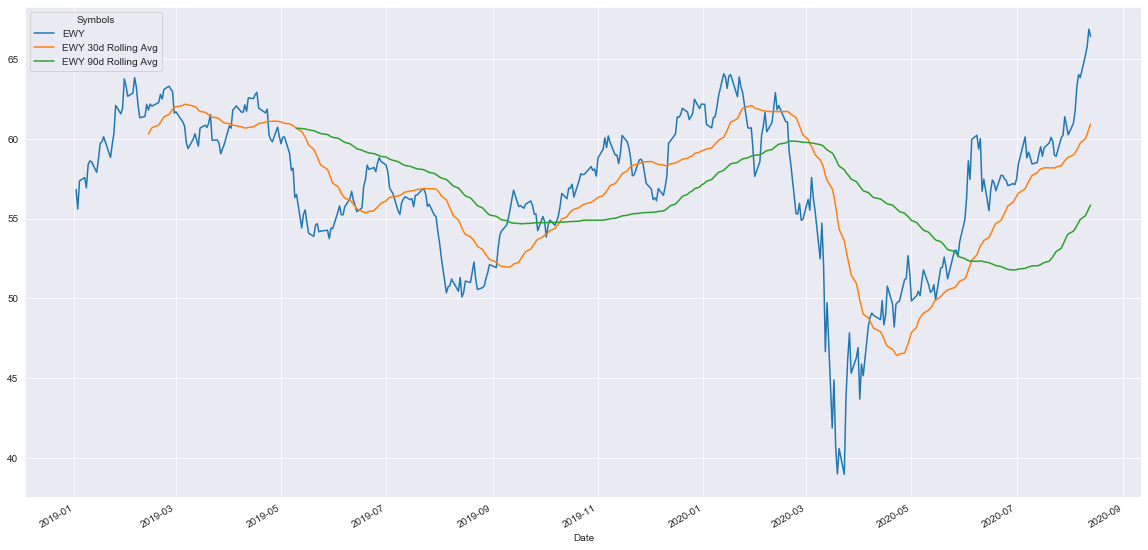

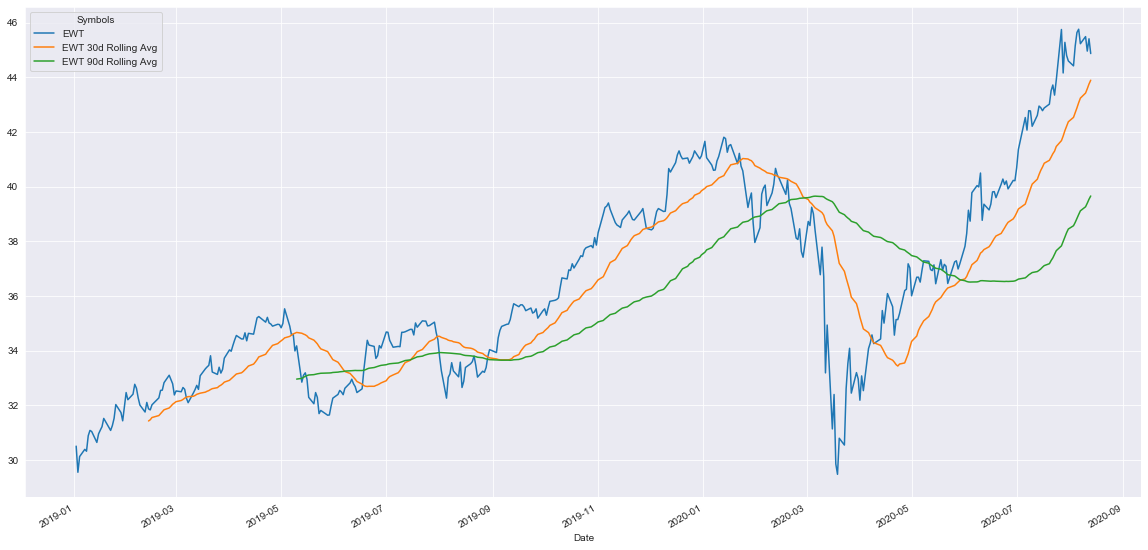

In [4]:
#Calculating 30 & 90 day rolling averages 

#South Korea (EWY)
etf_data['EWY 30d Rolling Avg'] = np.round(etf_data['EWY'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWY 90d Rolling Avg'] = np.round(etf_data['EWY'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWY', 'EWY 30d Rolling Avg', 'EWY 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#Taiwan (EWT)
etf_data['EWT 30d Rolling Avg'] = np.round(etf_data['EWT'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWT 90d Rolling Avg'] = np.round(etf_data['EWT'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWT', 'EWT 30d Rolling Avg', 'EWT 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

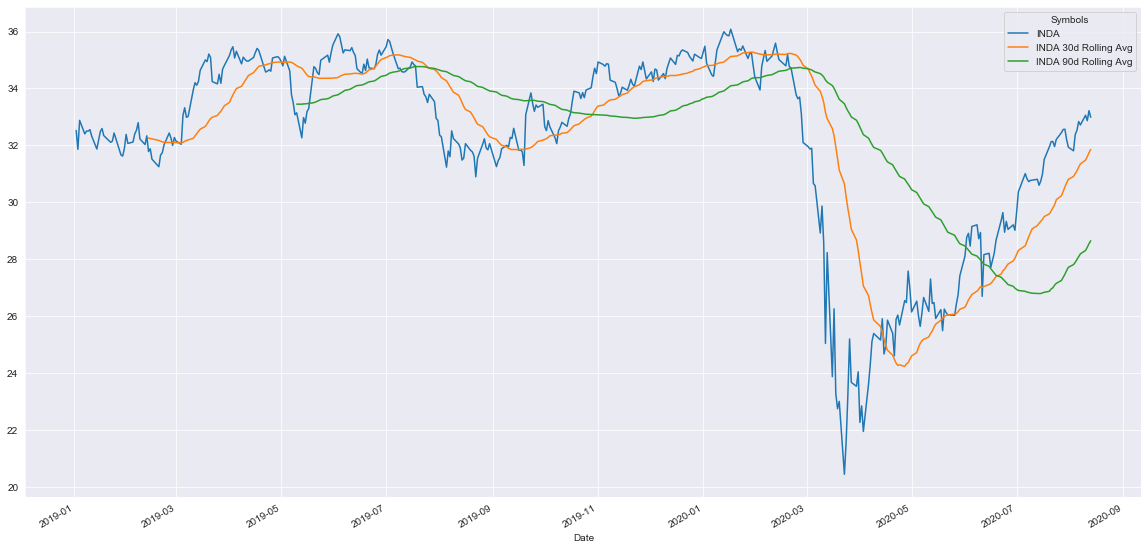

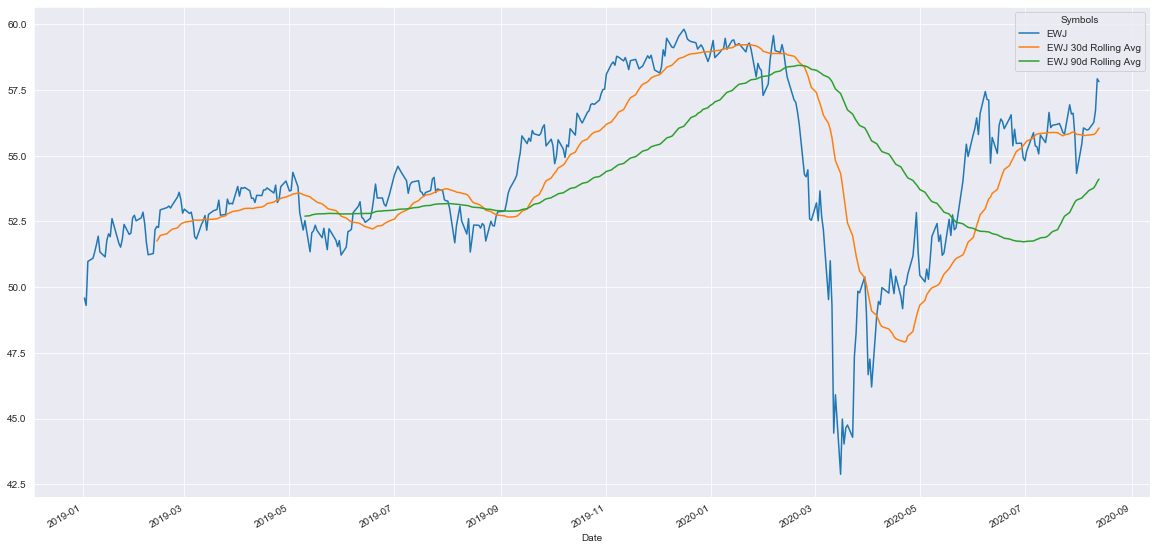

In [5]:
#India (INDA)
etf_data['INDA 30d Rolling Avg'] = np.round(etf_data['INDA'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['INDA 90d Rolling Avg'] = np.round(etf_data['INDA'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['INDA', 'INDA 30d Rolling Avg', 'INDA 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#Japan (EWJ)
etf_data['EWJ 30d Rolling Avg'] = np.round(etf_data['EWJ'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWJ 90d Rolling Avg'] = np.round(etf_data['EWJ'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWJ', 'EWJ 30d Rolling Avg', 'EWJ 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

### 30/90d Cumulative Return Rolling Averages [South Korea/Taiwan/India/Japan]

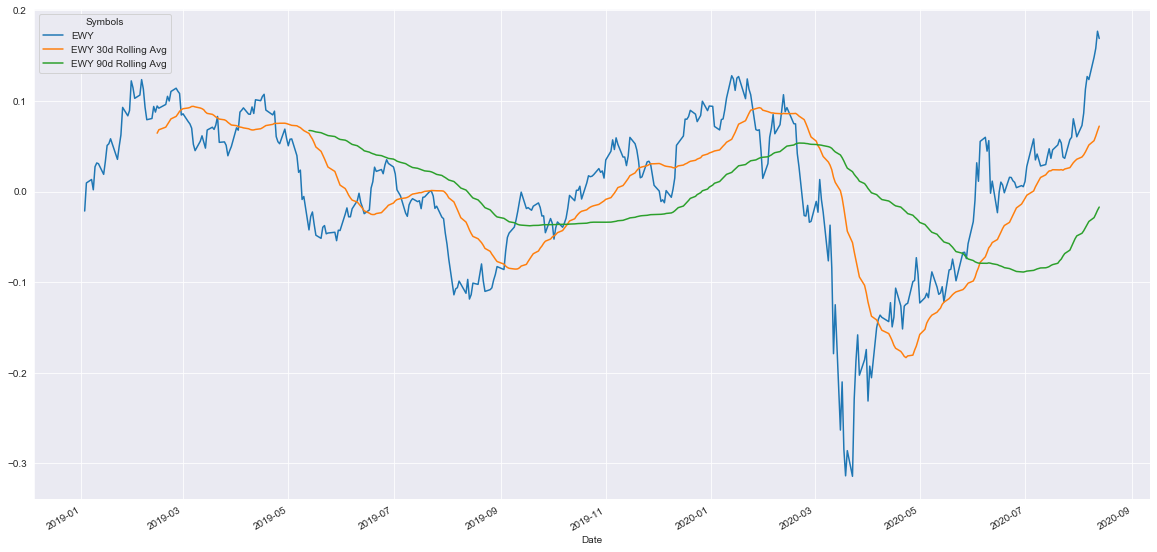

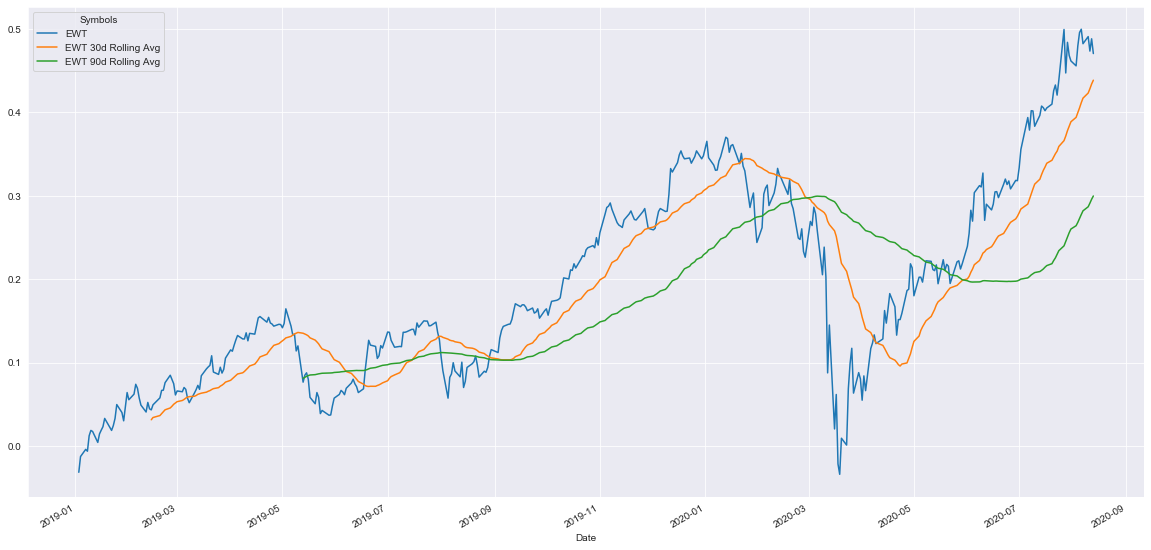

In [6]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#South Korea (EWY)
cumulative_returns['EWY 30d Rolling Avg'] = np.round(cumulative_returns['EWY'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWY 90d Rolling Avg'] = np.round(cumulative_returns['EWY'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWY', 'EWY 30d Rolling Avg', 'EWY 90d Rolling Avg']].plot(figsize=(20,10)) 

#Taiwan (EWT)
cumulative_returns['EWT 30d Rolling Avg'] = np.round(cumulative_returns['EWT'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWT 90d Rolling Avg'] = np.round(cumulative_returns['EWT'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWT', 'EWT 30d Rolling Avg', 'EWT 90d Rolling Avg']].plot(figsize=(20,10)) 

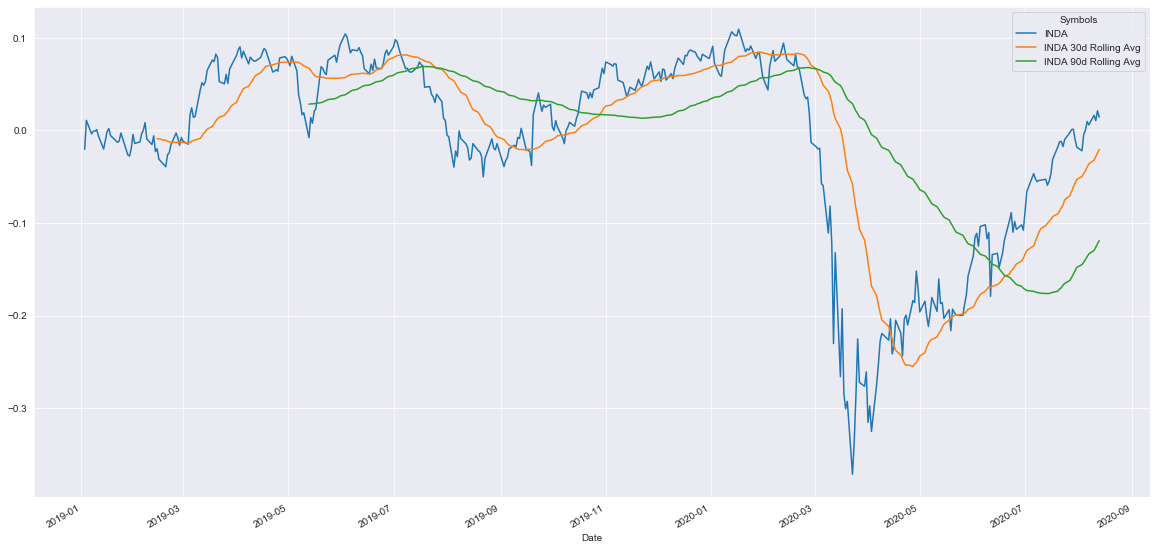

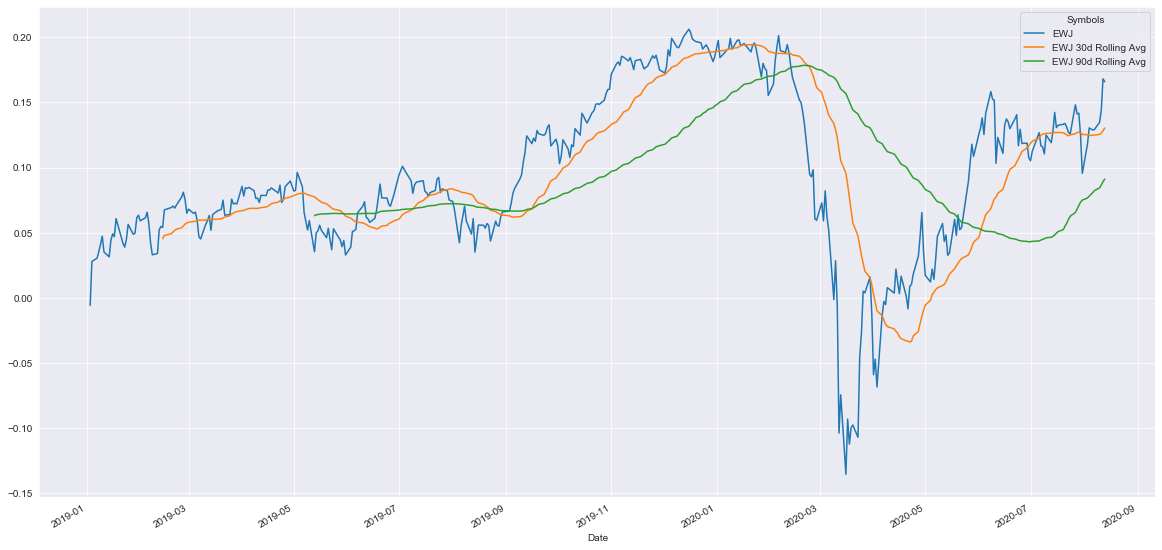

In [7]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#India (INDA)
cumulative_returns['INDA 30d Rolling Avg'] = np.round(cumulative_returns['INDA'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['INDA 90d Rolling Avg'] = np.round(cumulative_returns['INDA'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['INDA', 'INDA 30d Rolling Avg', 'INDA 90d Rolling Avg']].plot(figsize=(20,10)) 

#Japan (EWJ)
cumulative_returns['EWJ 30d Rolling Avg'] = np.round(cumulative_returns['EWJ'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWJ 90d Rolling Avg'] = np.round(cumulative_returns['EWJ'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWJ', 'EWJ 30d Rolling Avg', 'EWJ 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Nation's ETF

In [8]:
#EWY = South Korea, EWT = Taiwan, INDA = India, EWJ = Japan, EWH = Hong Kong, EWA = Australia, EWS = Singapore,
#THD = Thailand, EWM = Malaysia, EIDO = Indonesia, EPHE = Phillipines, MCHI = China

#South Korea (EWJ)
#Return
etf_data['EWY Return'] = np.log(etf_data['EWY']/etf_data['EWY'].shift(1))
#30d moving volatility 
etf_data['EWY Mov_Volatility'] = etf_data['EWY'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Taiwan (EWT)
#Return
etf_data['EWT Return'] = np.log(etf_data['EWT']/etf_data['EWT'].shift(1))
#30d moving volatility 
etf_data['EWT Mov_Volatility'] = etf_data['EWT'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#India (INDA)
#Return
etf_data['INDA Return'] = np.log(etf_data['INDA']/etf_data['INDA'].shift(1))
#30d moving volatility 
etf_data['INDA Mov_Volatility'] = etf_data['INDA'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Japan (EWJ)
#Return
etf_data['EWJ Return'] = np.log(etf_data['EWJ']/etf_data['EWJ'].shift(1))
#30d moving volatility 
etf_data['EWJ Mov_Volatility'] = etf_data['EWJ'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Hong Kong (EWH)
#Return
etf_data['EWH Return'] = np.log(etf_data['EWH']/etf_data['EWH'].shift(1))
#30d moving volatility 
etf_data['EWH Mov_Volatility'] = etf_data['EWH'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Australia (EWA)
#Return
etf_data['EWA Return'] = np.log(etf_data['EWA']/etf_data['EWA'].shift(1))
#30d moving volatility 
etf_data['EWA Mov_Volatility'] = etf_data['EWA'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Singapore (EWS)
#Return
etf_data['EWS Return'] = np.log(etf_data['EWS']/etf_data['EWS'].shift(1))
#30d moving volatility 
etf_data['EWS Mov_Volatility'] = etf_data['EWS'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Thailand (THD)
#Return
etf_data['THD Return'] = np.log(etf_data['THD']/etf_data['THD'].shift(1))
#30d moving volatility 
etf_data['THD Mov_Volatility'] = etf_data['THD'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Malaysia (EWM)
#Return
etf_data['EWM Return'] = np.log(etf_data['EWM']/etf_data['EWM'].shift(1))
#30d moving volatility 
etf_data['EWM Mov_Volatility'] = etf_data['EWM'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Indonesia (EIDO)
#Return
etf_data['EIDO Return'] = np.log(etf_data['EIDO']/etf_data['EIDO'].shift(1))
#30d moving volatility 
etf_data['EIDO Mov_Volatility'] = etf_data['EIDO'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#China 
#Return
etf_data['MCHI Return'] = np.log(etf_data['MCHI']/etf_data['MCHI'].shift(1))
#30d moving volatility 
etf_data['MCHI Mov_Volatility'] = etf_data['MCHI'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

In [9]:
#Examining updated df
etf_data.info()
etf_data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2019-01-02 to 2020-08-13
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EWY                   408 non-null    float64
 1   EWT                   408 non-null    float64
 2   INDA                  408 non-null    float64
 3   EWJ                   408 non-null    float64
 4   EWH                   408 non-null    float64
 5   EWA                   408 non-null    float64
 6   EWS                   408 non-null    float64
 7   THD                   408 non-null    float64
 8   EWM                   408 non-null    float64
 9   EIDO                  408 non-null    float64
 10  EPHE                  408 non-null    float64
 11  MCHI                  408 non-null    float64
 12  EWY 30d Rolling Avg   379 non-null    float64
 13  EWY 90d Rolling Avg   319 non-null    float64
 14  EWT 30d Rolling Avg   379 non-null    float64
 15  EWT 

Symbols,EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,...,EWS Return,EWS Mov_Volatility,THD Return,THD Mov_Volatility,EWM Return,EWM Mov_Volatility,EIDO Return,EIDO Mov_Volatility,MCHI Return,MCHI Mov_Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,63.849998,45.230000,32.720001,56.00,21.299999,20.389999,18.959999,69.230003,27.41,18.809999,...,-0.009971,1.517440,-0.011061,6.704203,-0.011968,4.057558,-0.021563,1.953880,-0.033173,15.323985
2020-08-10,65.239998,45.490002,33.060001,56.27,21.530001,20.610001,18.959999,69.180000,27.25,19.070000,...,0.000000,1.456894,-0.000723,6.781290,-0.005854,3.496930,0.013728,1.833153,-0.006101,14.004682
2020-08-11,65.809998,44.959999,32.869999,56.73,21.709999,20.629999,18.799999,69.250000,26.98,18.959999,...,-0.008475,1.421709,0.001011,6.861933,-0.009958,3.030321,-0.005785,1.746303,-0.001253,12.428054
2020-08-12,66.879997,45.410000,33.220001,57.93,22.230000,20.889999,19.280001,70.180000,27.15,19.379999,...,0.025211,1.397192,0.013340,6.853259,0.006281,2.337104,0.021910,1.549661,0.014516,10.421565
2020-08-13,66.425003,44.869999,32.990002,57.82,22.209999,20.555000,19.280001,70.769997,27.32,19.340000,...,0.000000,1.391259,0.008372,6.806703,0.006242,1.814661,-0.002066,1.420685,-0.010763,8.192462


### Visualizing Trends [South Korea/Taiwan/India/Japan]

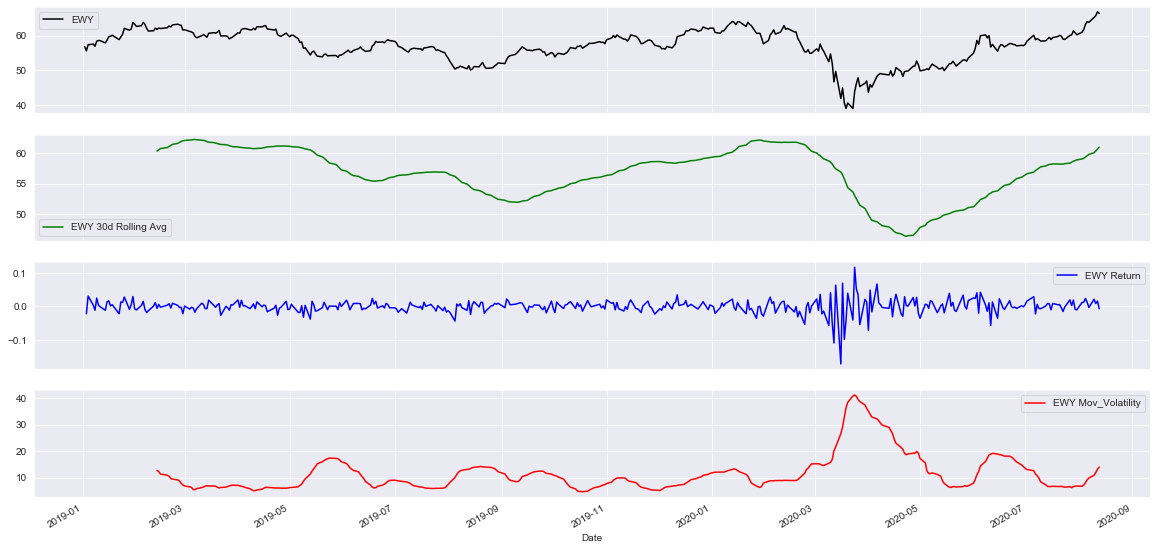

In [10]:
#Visualizing the results

#South Korea (EWY)
etf_data[['EWY','EWY 30d Rolling Avg','EWY Return','EWY Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

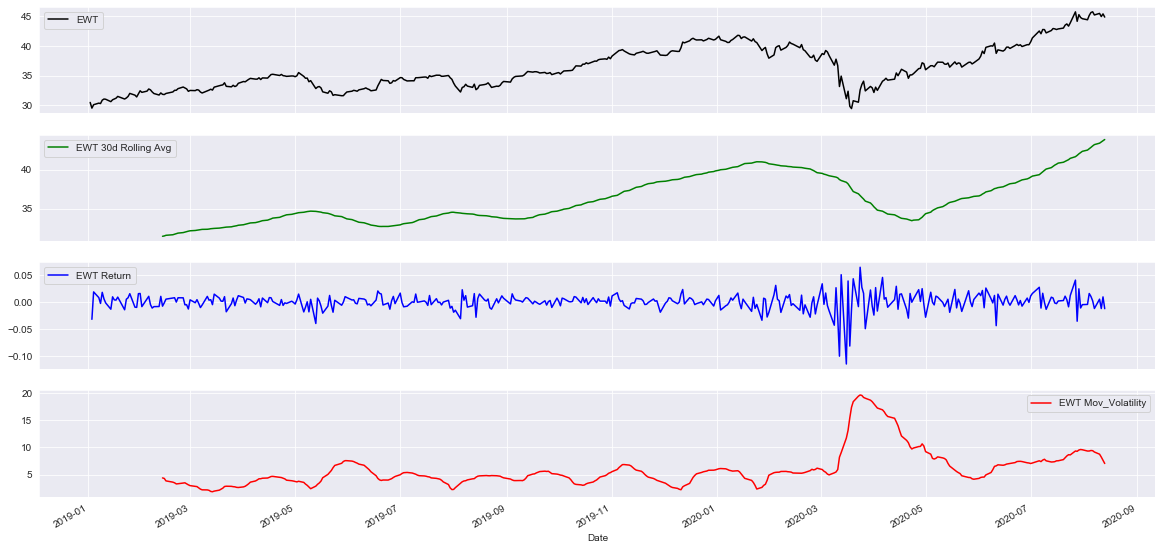

In [11]:
#Taiwan (EWT)
etf_data[['EWT','EWT 30d Rolling Avg','EWT Return','EWT Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

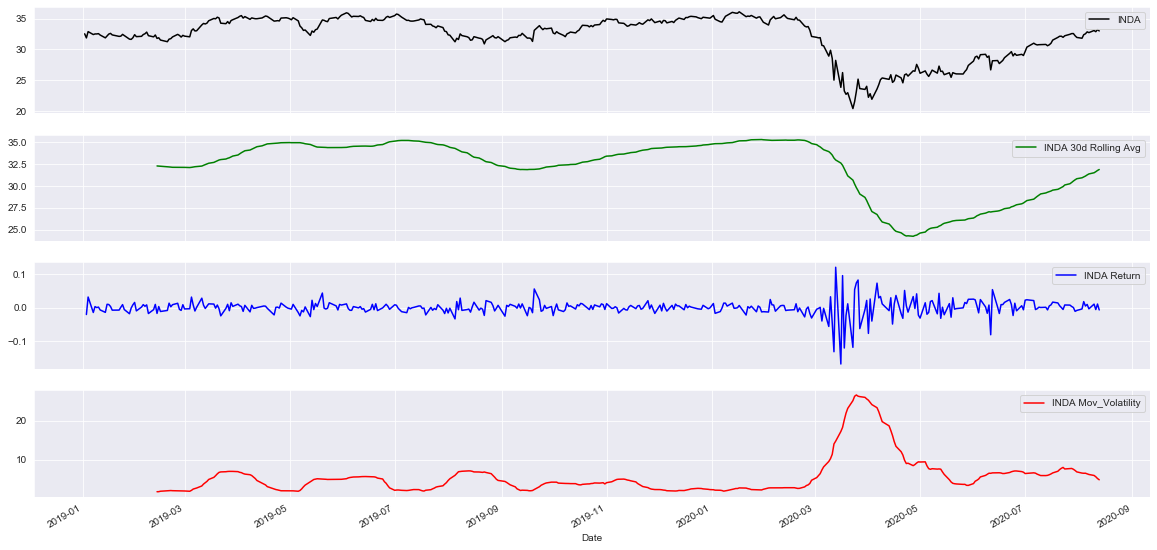

In [12]:
#India (INDA)
etf_data[['INDA','INDA 30d Rolling Avg','INDA Return','INDA Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

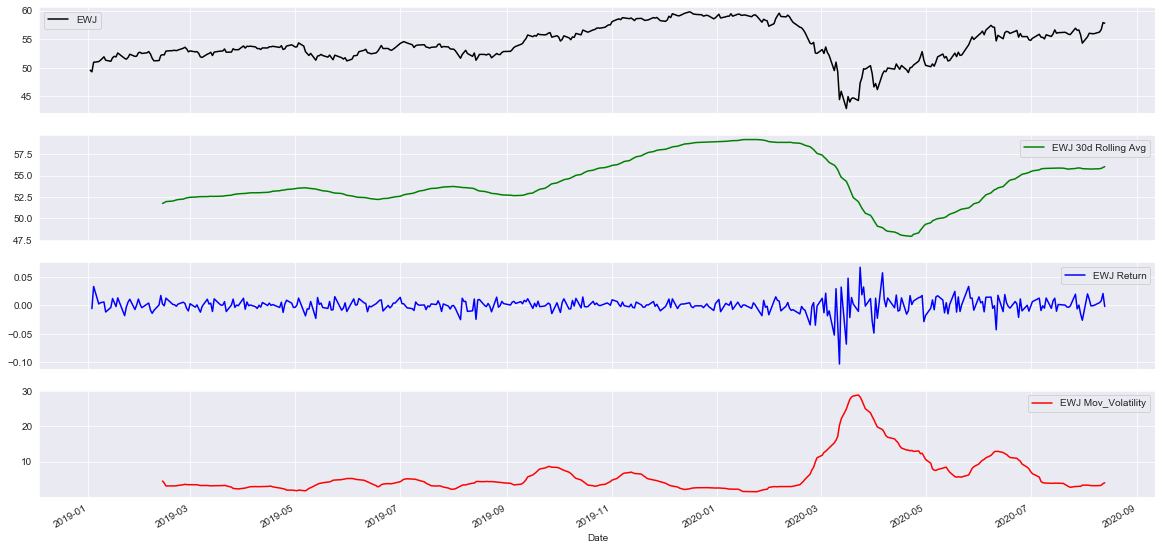

In [13]:
#Japan (EWJ)
etf_data[['EWJ','EWJ 30d Rolling Avg','EWJ Return','EWJ Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing ETF Porfolio Weights

In [14]:
#EWY = South Korea, EWT = Taiwan, INDA = India, EWJ = Japan, EWH = Hong Kong, EWA = Australia, EWS = Singapore,
#THD = Thailand, EWM = Malaysia, EIDO = Indonesia, EPHE = Phillipines, MCHI= China-

#Defining the ETFS we're building a portfolio out of
currency_tickers = ['EWY','EWT','INDA','EWJ','EWH','EWA','EWS','THD','EWM','EIDO','EPHE','MCHI']

#Calculating number of currencies we're dealing with
size_portfolio = len(etf_tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
etf_returns = np.log(etf_data/etf_data.shift(1))

#Calculating average return over a year's worth of trading days
etf_returns.mean()*253

#Calculating covariance over a years's worth of trading days
etf_returns.cov()*253

Symbols,EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI
Symbols,,,,,,,,,,,,
EWY,0.116071,0.077345,0.097676,0.057539,0.073390,0.105989,0.074874,0.088135,0.069565,0.105772,0.099514,0.075860
EWT,0.077345,0.063718,0.068669,0.041292,0.052940,0.076323,0.053929,0.065031,0.050851,0.074801,0.072874,0.057903
INDA,0.097676,0.068669,0.134731,0.052852,0.068021,0.107935,0.070605,0.093558,0.067732,0.110675,0.104590,0.064776
EWJ,0.057539,0.041292,0.052852,0.044799,0.040011,0.065168,0.042978,0.050388,0.037735,0.059657,0.056167,0.042418
EWH,0.073390,0.052940,0.068021,0.040011,0.067112,0.072677,0.054592,0.063973,0.048588,0.074267,0.069600,0.061066
EWA,0.105989,0.076323,0.107935,0.065168,0.072677,0.145606,0.080546,0.097053,0.071575,0.115937,0.111289,0.074597
EWS,0.074874,0.053929,0.070605,0.042978,0.054592,0.080546,0.064479,0.064444,0.049960,0.081056,0.070411,0.055520
THD,0.088135,0.065031,0.093558,0.050388,0.063973,0.097053,0.064444,0.106263,0.066839,0.095864,0.101008,0.062675
EWM,0.069565,0.050851,0.067732,0.037735,0.048588,0.071575,0.049960,0.066839,0.059890,0.074488,0.074399,0.049725


### Calculating Expected Return, Var & Vol for One Possible Set of ETF Portfolio Weights

In [15]:
#Creating random position weights
weights = np.random.random(size_portfolio) #creating random position percentages
weights = weights/np.sum(weights) #scaling weights
weights

array([0.06025782, 0.11015884, 0.12535742, 0.02710401, 0.1231889 ,
       0.04500292, 0.01694517, 0.07938628, 0.07674567, 0.0956783 ,
       0.11024961, 0.12992505])

In [16]:
#Calculating expected portfolio return with random weights
np.sum(etf_returns.mean()*weights)*253

0.03540077712618314

In [17]:
#Calculating expected portfolio variance with random weights

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))

0.07681371520561726

In [18]:
#Calculating expected portfolio volatility with random weights
np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))

0.27715287334901884

### Calculating Expected Return, Var & Vol for Ten Thousand [10000] Potential ETF Portfolios Via Monte Carlo

In [19]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (10000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(etf_returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

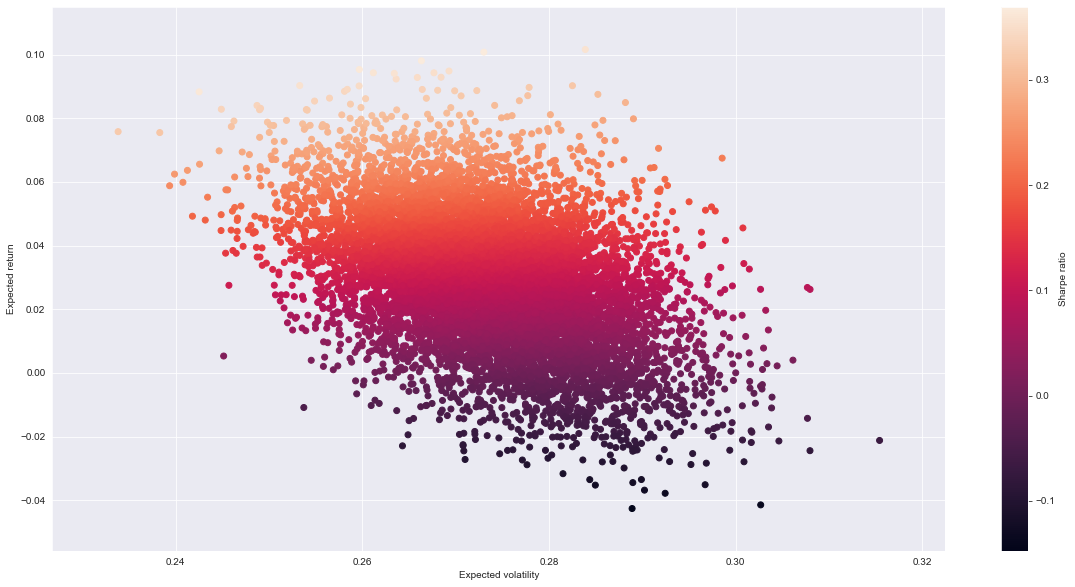

In [20]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Portfolio Weightings Mathematically

In [21]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(etf_returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [22]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [23]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI]')
print((opts_Sharpe['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.23976782 0.25242431 0.94986026]


In [24]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [25]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI]')
print((opts_variance['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE ETF PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWY,EWT,INDA,EWJ,EWH,EWA,EWS,THD,EWM,EIDO,EPHE,MCHI]
[0.      0.      0.      0.73935 0.02269 0.      0.      0.      0.23797
 0.      0.      0.     ]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE ETF PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.06603056 0.2075077  0.31820777]


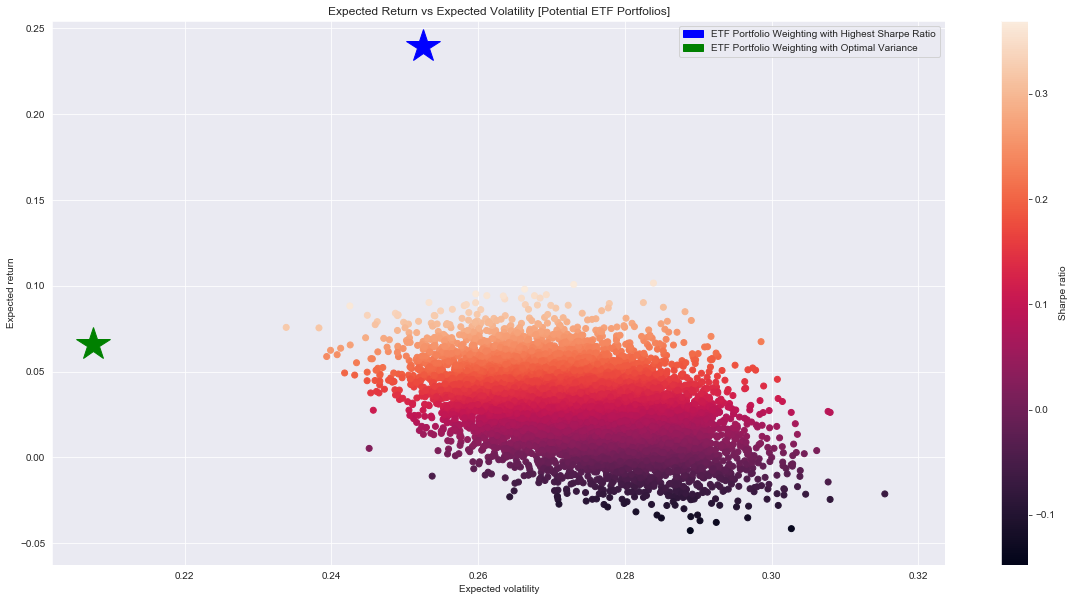

In [26]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'b*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
blue = mpatches.Patch(color='b', label='ETF Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='ETF Portfolio Weighting with Optimal Variance')
plt.legend(handles=[blue,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential ETF Portfolios]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');